In [1]:
#importando bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.metrics import (accuracy_score, precision_score,recall_score, f1_score,
                             roc_auc_score, roc_curve, classification_report,
                             confusion_matrix, plot_confusion_matrix)

import sklearn.metrics as metrics
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

# setting up plot style 
style.use('seaborn-poster')
style.use('fivethirtyeight')



pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)



ImportError: cannot import name 'rcParams' from 'matplotlib' (C:\Users\Fabio\anaconda3\lib\site-packages\matplotlib\__init__.py)

In [2]:
#import dataset

df = pd.read_csv('satisfaction.csv')
df.head()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_city,customer_state,review_score,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,boleto,credit_card,debit_card,not_defined,voucher
0,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,sao paulo,SP,4.0,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,0.0,1.0,0.0,0.0,2.0
1,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,barreiras,BA,4.0,118.70,22.76,perfumaria,29.0,178.0,1.0,1.0,0.0,0.0,0.0,0.0
2,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,vianopolis,GO,5.0,159.90,19.22,automotivo,46.0,232.0,1.0,0.0,3.0,0.0,0.0,0.0
3,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,sao goncalo do amarante,RN,5.0,45.00,27.20,pet_shop,59.0,468.0,3.0,0.0,1.0,0.0,0.0,0.0
4,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,santo andre,SP,5.0,19.90,8.72,papelaria,38.0,316.0,4.0,0.0,1.0,0.0,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92309 entries, 0 to 92308
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_purchase_timestamp       92309 non-null  object 
 1   order_approved_at              92309 non-null  object 
 2   order_delivered_carrier_date   92309 non-null  object 
 3   order_delivered_customer_date  92309 non-null  object 
 4   order_estimated_delivery_date  92309 non-null  object 
 5   customer_city                  92309 non-null  object 
 6   customer_state                 92309 non-null  object 
 7   review_score                   92309 non-null  float64
 8   price                          92309 non-null  float64
 9   freight_value                  92309 non-null  float64
 10  product_category_name          92309 non-null  object 
 11  product_name_lenght            92309 non-null  float64
 12  product_description_lenght     92309 non-null 

# Feature Engineering

## Date Columns

Add columns that are the difference between `order purchase` and anothers date columns

In [4]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])

In [5]:
df['diff_approved'] = df['order_approved_at'] - df['order_purchase_timestamp']
df['diff_carrier'] = df['order_delivered_carrier_date'] - df['order_purchase_timestamp']
df['diff_customer'] = df['order_delivered_customer_date'] - df['order_purchase_timestamp']
df['diff_estimate'] = df['order_estimated_delivery_date'] - df['order_purchase_timestamp']
df['diff_est_del'] = df['order_estimated_delivery_date'] - df['order_delivered_customer_date']

#transforming the values in days difference
df['diff_approved']=df['diff_approved']/np.timedelta64(1,'D')
df['diff_carrier']=df['diff_carrier']/np.timedelta64(1,'D')
df['diff_customer']=df['diff_customer']/np.timedelta64(1,'D')
df['diff_estimate']=df['diff_estimate']/np.timedelta64(1,'D')
df['diff_est_del']=df['diff_est_del']/np.timedelta64(1,'D')

df.head()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_city,customer_state,review_score,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,boleto,credit_card,debit_card,not_defined,voucher,diff_approved,diff_carrier,diff_customer,diff_estimate,diff_est_del
0,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,sao paulo,SP,4.0,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,0.0,1.0,0.0,0.0,2.0,0.007431,2.373924,8.436574,15.544063,7.107488
1,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,barreiras,BA,4.0,118.70,22.76,perfumaria,29.0,178.0,1.0,1.0,0.0,0.0,0.0,0.0,1.279745,1.742627,13.782037,19.137766,5.355729
2,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,vianopolis,GO,5.0,159.90,19.22,automotivo,46.0,232.0,1.0,0.0,3.0,0.0,0.0,0.0,0.011505,0.216100,9.394213,26.639711,17.245498
3,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,sao goncalo do amarante,RN,5.0,45.00,27.20,pet_shop,59.0,468.0,3.0,0.0,1.0,0.0,0.0,0.0,0.012419,3.758252,13.208750,26.188819,12.980069
4,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,santo andre,SP,5.0,19.90,8.72,papelaria,38.0,316.0,4.0,0.0,1.0,0.0,0.0,0.0,0.042940,0.936053,2.873877,12.112049,9.238171


In [6]:
#drop date columns
cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
        'order_delivered_customer_date', 'order_estimated_delivery_date']

df.drop(columns = cols, axis= 1, inplace = True)
df.head()

,customer_city,customer_state,review_score,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,boleto,credit_card,debit_card,not_defined,voucher,diff_approved,diff_carrier,diff_customer,diff_estimate,diff_est_del
0,sao paulo,SP,4.0,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,0.0,1.0,0.0,0.0,2.0,0.007431,2.373924,8.436574,15.544063,7.107488
1,barreiras,BA,4.0,118.70,22.76,perfumaria,29.0,178.0,1.0,1.0,0.0,0.0,0.0,0.0,1.279745,1.742627,13.782037,19.137766,5.355729
2,vianopolis,GO,5.0,159.90,19.22,automotivo,46.0,232.0,1.0,0.0,3.0,0.0,0.0,0.0,0.011505,0.216100,9.394213,26.639711,17.245498
3,sao goncalo do amarante,RN,5.0,45.00,27.20,pet_shop,59.0,468.0,3.0,0.0,1.0,0.0,0.0,0.0,0.012419,3.758252,13.208750,26.188819,12.980069
4,santo andre,SP,5.0,19.90,8.72,papelaria,38.0,316.0,4.0,0.0,1.0,0.0,0.0,0.0,0.042940,0.936053,2.873877,12.112049,9.238171


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92309 entries, 0 to 92308
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_city               92309 non-null  object 
 1   customer_state              92309 non-null  object 
 2   review_score                92309 non-null  float64
 3   price                       92309 non-null  float64
 4   freight_value               92309 non-null  float64
 5   product_category_name       92309 non-null  object 
 6   product_name_lenght         92309 non-null  float64
 7   product_description_lenght  92309 non-null  float64
 8   product_photos_qty          92309 non-null  float64
 9   boleto                      92309 non-null  float64
 10  credit_card                 92309 non-null  float64
 11  debit_card                  92309 non-null  float64
 12  not_defined                 92309 non-null  float64
 13  voucher                     923

## Customer city columns

In [8]:
df['customer_city'].value_counts()

sao paulo         14545
rio de janeiro     6338
belo horizonte     2571
brasilia           1998
curitiba           1414
                  ...  
riacho da cruz        1
coreau                1
guimaraes             1
buriti alegre         1
croata                1
Name: customer_city, Length: 3990, dtype: int64

In [9]:
#list of capitals:

capitals = ["rio branco",
"maceio",
"macapa",
"manaus",
"salvador",
"fortaleza",
"brasilia",
"vitria",
"goiania",
"sao luis",
"cuiaba",
"campo grande",
"belo horizonte",
"belem",
"joao pessoa",
"curitiba",
"recife",
"teresina",
"rio de janeiro",
"natal",
"porto alegre",
"porto velho",
"boa vista",
"florianopolis",
"sao paulo",
"aracaju",
"palmas" ]

In [10]:
#create a new column based capitals list
def cap (row):
    if row['customer_city'] in capitals:
        val = 1
    else:
        val = 0
    return val

In [11]:
df['customer_capital'] = df.apply(cap, axis = 1)
df.head()

,customer_city,customer_state,review_score,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,boleto,credit_card,debit_card,not_defined,voucher,diff_approved,diff_carrier,diff_customer,diff_estimate,diff_est_del,customer_capital
0,sao paulo,SP,4.0,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,0.0,1.0,0.0,0.0,2.0,0.007431,2.373924,8.436574,15.544063,7.107488,1
1,barreiras,BA,4.0,118.70,22.76,perfumaria,29.0,178.0,1.0,1.0,0.0,0.0,0.0,0.0,1.279745,1.742627,13.782037,19.137766,5.355729,0
2,vianopolis,GO,5.0,159.90,19.22,automotivo,46.0,232.0,1.0,0.0,3.0,0.0,0.0,0.0,0.011505,0.216100,9.394213,26.639711,17.245498,0
3,sao goncalo do amarante,RN,5.0,45.00,27.20,pet_shop,59.0,468.0,3.0,0.0,1.0,0.0,0.0,0.0,0.012419,3.758252,13.208750,26.188819,12.980069,0
4,santo andre,SP,5.0,19.90,8.72,papelaria,38.0,316.0,4.0,0.0,1.0,0.0,0.0,0.0,0.042940,0.936053,2.873877,12.112049,9.238171,0


In [12]:
#drop the city column
df.drop(columns = 'customer_city', axis = 1, inplace = True)
df.head()

,customer_state,review_score,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,boleto,credit_card,debit_card,not_defined,voucher,diff_approved,diff_carrier,diff_customer,diff_estimate,diff_est_del,customer_capital
0,SP,4.0,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,0.0,1.0,0.0,0.0,2.0,0.007431,2.373924,8.436574,15.544063,7.107488,1
1,BA,4.0,118.70,22.76,perfumaria,29.0,178.0,1.0,1.0,0.0,0.0,0.0,0.0,1.279745,1.742627,13.782037,19.137766,5.355729,0
2,GO,5.0,159.90,19.22,automotivo,46.0,232.0,1.0,0.0,3.0,0.0,0.0,0.0,0.011505,0.216100,9.394213,26.639711,17.245498,0
3,RN,5.0,45.00,27.20,pet_shop,59.0,468.0,3.0,0.0,1.0,0.0,0.0,0.0,0.012419,3.758252,13.208750,26.188819,12.980069,0
4,SP,5.0,19.90,8.72,papelaria,38.0,316.0,4.0,0.0,1.0,0.0,0.0,0.0,0.042940,0.936053,2.873877,12.112049,9.238171,0


## Customer State

In [13]:
df.customer_state.value_counts()

SP    38964
RJ    11812
MG    10856
RS     5123
PR     4708
SC     3351
BA     3048
DF     2006
ES     1891
GO     1868
PE     1514
CE     1190
PA      889
MT      857
MS      681
MA      676
PB      485
RN      455
PI      446
AL      379
SE      312
TO      260
RO      227
AM      143
AC       73
AP       61
RR       34
Name: customer_state, dtype: int64

In [14]:
#create a regions list
norte = ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC']
nordeste = ['MA', 'PI', 'CE', 'RN', 'PE', 'PB', 'SE', 'AL', 'BA']
centro_oeste = ['MT', 'MS', 'GO']
sul = ['PR', 'RS', 'SC']
sudeste = ['SP', 'RJ', 'ES', 'MG']

In [15]:
#create a new feature based in region list
def region (row):
    val = ""
    if row['customer_state'] in norte:
        val = 'norte'
    elif row['customer_state'] in nordeste:
        val = 'nordeste'
    elif row['customer_state'] in centro_oeste:
        val = 'centro_oeste'
    elif row['customer_state'] in sul:
        val = 'sul'
    elif row['customer_state'] in sudeste:
        val = 'sudeste'
    return val

In [16]:
df['customer_region'] = df.apply(region, axis = 1)

In [17]:
#drop the customer_state colum
df.drop(columns = 'customer_state', axis = 1, inplace = True)
df.head()

,review_score,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,boleto,credit_card,debit_card,not_defined,voucher,diff_approved,diff_carrier,diff_customer,diff_estimate,diff_est_del,customer_capital,customer_region
0,4.0,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,0.0,1.0,0.0,0.0,2.0,0.007431,2.373924,8.436574,15.544063,7.107488,1,sudeste
1,4.0,118.70,22.76,perfumaria,29.0,178.0,1.0,1.0,0.0,0.0,0.0,0.0,1.279745,1.742627,13.782037,19.137766,5.355729,0,nordeste
2,5.0,159.90,19.22,automotivo,46.0,232.0,1.0,0.0,3.0,0.0,0.0,0.0,0.011505,0.216100,9.394213,26.639711,17.245498,0,centro_oeste
3,5.0,45.00,27.20,pet_shop,59.0,468.0,3.0,0.0,1.0,0.0,0.0,0.0,0.012419,3.758252,13.208750,26.188819,12.980069,0,nordeste
4,5.0,19.90,8.72,papelaria,38.0,316.0,4.0,0.0,1.0,0.0,0.0,0.0,0.042940,0.936053,2.873877,12.112049,9.238171,0,sudeste


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92309 entries, 0 to 92308
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   review_score                92309 non-null  float64
 1   price                       92309 non-null  float64
 2   freight_value               92309 non-null  float64
 3   product_category_name       92309 non-null  object 
 4   product_name_lenght         92309 non-null  float64
 5   product_description_lenght  92309 non-null  float64
 6   product_photos_qty          92309 non-null  float64
 7   boleto                      92309 non-null  float64
 8   credit_card                 92309 non-null  float64
 9   debit_card                  92309 non-null  float64
 10  not_defined                 92309 non-null  float64
 11  voucher                     92309 non-null  float64
 12  diff_approved               92309 non-null  float64
 13  diff_carrier                923

## Product category

In [19]:
product_percent = df['product_category_name'].value_counts(normalize=True) * 100

In [20]:
products = product_percent[product_percent < 0.5]
products = products.index.tolist()
products

['casa_construcao',
 'alimentos',
 'moveis_sala',
 'casa_conforto',
 'audio',
 'bebidas',
 'livros_tecnicos',
 'market_place',
 'fashion_calcados',
 'climatizacao',
 'industria_comercio_e_negocios',
 'construcao_ferramentas_iluminacao',
 'moveis_cozinha_area_de_servico_jantar_e_jardim',
 'eletrodomesticos_2',
 'alimentos_bebidas',
 'construcao_ferramentas_jardim',
 'telefonia_fixa',
 'artes',
 'pcs',
 'agro_industria_e_comercio',
 'construcao_ferramentas_seguranca',
 'sinalizacao_e_seguranca',
 'artigos_de_natal',
 'fashion_underwear_e_moda_praia',
 'fashion_roupa_masculina',
 'construcao_ferramentas_ferramentas',
 'moveis_quarto',
 'tablets_impressao_imagem',
 'portateis_casa_forno_e_cafe',
 'cine_foto',
 'dvds_blu_ray',
 'livros_importados',
 'musica',
 'moveis_colchao_e_estofado',
 'artigos_de_festas',
 'fashion_roupa_feminina',
 'flores',
 'fashion_esporte',
 'casa_conforto_2',
 'fraldas_higiene',
 'artes_e_artesanato',
 'la_cuisine',
 'cds_dvds_musicais',
 'portateis_cozinha_e_pre

In [21]:
df = df[~df.product_category_name.isin(products)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85769 entries, 0 to 92308
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   review_score                85769 non-null  float64
 1   price                       85769 non-null  float64
 2   freight_value               85769 non-null  float64
 3   product_category_name       85769 non-null  object 
 4   product_name_lenght         85769 non-null  float64
 5   product_description_lenght  85769 non-null  float64
 6   product_photos_qty          85769 non-null  float64
 7   boleto                      85769 non-null  float64
 8   credit_card                 85769 non-null  float64
 9   debit_card                  85769 non-null  float64
 10  not_defined                 85769 non-null  float64
 11  voucher                     85769 non-null  float64
 12  diff_approved               85769 non-null  float64
 13  diff_carrier                857

In [22]:
df.product_category_name.value_counts()

cama_mesa_banho                      9116
beleza_saude                         8188
esporte_lazer                        7147
informatica_acessorios               6220
moveis_decoracao                     6090
utilidades_domesticas                5393
relogios_presentes                   5179
telefonia                            3758
automotivo                           3621
brinquedos                           3606
cool_stuff                           3298
ferramentas_jardim                   3259
perfumaria                           2963
bebes                                2616
eletronicos                          2331
papelaria                            2186
fashion_bolsas_e_acessorios          1789
pet_shop                             1624
no info                              1323
moveis_escritorio                    1103
malas_acessorios                      966
consoles_games                        926
eletrodomesticos                      721
construcao_ferramentas_construcao 

# Transforming Categorical Values

### Encoding Independent variables

In [23]:
# Get list of categorical variables
datatype = df.dtypes
object_cols = datatype[(datatype == 'object') | (datatype == 'category')].index.tolist()
#object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['product_category_name', 'customer_region']


In [24]:
#get dummies
dummy = pd.get_dummies(df[['customer_region', 'product_category_name']], drop_first=True)

#concat dataframe
df = pd.concat([df, dummy], axis = 1)

#drop the columns:
df.drop(columns = object_cols, axis= 1, inplace = True)

#check
df.head()

,review_score,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,boleto,credit_card,debit_card,not_defined,voucher,diff_approved,diff_carrier,diff_customer,diff_estimate,diff_est_del,customer_capital,customer_region_centro_oeste,customer_region_nordeste,customer_region_norte,customer_region_sudeste,customer_region_sul,product_category_name_bebes,product_category_name_beleza_saude,product_category_name_brinquedos,product_category_name_cama_mesa_banho,product_category_name_consoles_games,product_category_name_construcao_ferramentas_construcao,product_category_name_cool_stuff,product_category_name_eletrodomesticos,product_category_name_eletronicos,product_category_name_eletroportateis,product_category_name_esporte_lazer,product_category_name_fashion_bolsas_e_acessorios,product_category_name_ferramentas_jardim,product_category_name_informatica_acessorios,product_category_name_instrumentos_musicais,product_category_name_livros_interesse_geral,product_category_name_malas_acessorios,product_category_name_moveis_decoracao,product_category_name_moveis_escritorio,product_category_name_no info,product_category_name_papelaria,product_category_name_perfumaria,product_category_name_pet_shop,product_category_name_relogios_presentes,product_category_name_telefonia,product_category_name_utilidades_domesticas
0,4.0,29.99,8.72,40.0,268.0,4.0,0.0,1.0,0.0,0.0,2.0,0.007431,2.373924,8.436574,15.544063,7.107488,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,4.0,118.70,22.76,29.0,178.0,1.0,1.0,0.0,0.0,0.0,0.0,1.279745,1.742627,13.782037,19.137766,5.355729,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,5.0,159.90,19.22,46.0,232.0,1.0,0.0,3.0,0.0,0.0,0.0,0.011505,0.216100,9.394213,26.639711,17.245498,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5.0,45.00,27.20,59.0,468.0,3.0,0.0,1.0,0.0,0.0,0.0,0.012419,3.758252,13.208750,26.188819,12.980069,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,5.0,19.90,8.72,38.0,316.0,4.0,0.0,1.0,0.0,0.0,0.0,0.042940,0.936053,2.873877,12.112049,9.238171,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


### Transforming the dependent variable

In [25]:
df['review_score'].value_counts()

5.0    54561
4.0    18118
1.0    10019
2.0     3071
Name: review_score, dtype: int64

In [26]:
# creating two labels to satisfaction

df.loc[df['review_score'] < 3, 'review_score'] = 0
df.loc[df['review_score'] > 3, 'review_score'] = 1

df.head()

,review_score,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,boleto,credit_card,debit_card,not_defined,voucher,diff_approved,diff_carrier,diff_customer,diff_estimate,diff_est_del,customer_capital,customer_region_centro_oeste,customer_region_nordeste,customer_region_norte,customer_region_sudeste,customer_region_sul,product_category_name_bebes,product_category_name_beleza_saude,product_category_name_brinquedos,product_category_name_cama_mesa_banho,product_category_name_consoles_games,product_category_name_construcao_ferramentas_construcao,product_category_name_cool_stuff,product_category_name_eletrodomesticos,product_category_name_eletronicos,product_category_name_eletroportateis,product_category_name_esporte_lazer,product_category_name_fashion_bolsas_e_acessorios,product_category_name_ferramentas_jardim,product_category_name_informatica_acessorios,product_category_name_instrumentos_musicais,product_category_name_livros_interesse_geral,product_category_name_malas_acessorios,product_category_name_moveis_decoracao,product_category_name_moveis_escritorio,product_category_name_no info,product_category_name_papelaria,product_category_name_perfumaria,product_category_name_pet_shop,product_category_name_relogios_presentes,product_category_name_telefonia,product_category_name_utilidades_domesticas
0,1.0,29.99,8.72,40.0,268.0,4.0,0.0,1.0,0.0,0.0,2.0,0.007431,2.373924,8.436574,15.544063,7.107488,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1.0,118.70,22.76,29.0,178.0,1.0,1.0,0.0,0.0,0.0,0.0,1.279745,1.742627,13.782037,19.137766,5.355729,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1.0,159.90,19.22,46.0,232.0,1.0,0.0,3.0,0.0,0.0,0.0,0.011505,0.216100,9.394213,26.639711,17.245498,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,45.00,27.20,59.0,468.0,3.0,0.0,1.0,0.0,0.0,0.0,0.012419,3.758252,13.208750,26.188819,12.980069,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1.0,19.90,8.72,38.0,316.0,4.0,0.0,1.0,0.0,0.0,0.0,0.042940,0.936053,2.873877,12.112049,9.238171,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [27]:
df['review_score'].value_counts()

1.0    72679
0.0    13090
Name: review_score, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85769 entries, 0 to 92308
Data columns (total 48 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   review_score                                             85769 non-null  float64
 1   price                                                    85769 non-null  float64
 2   freight_value                                            85769 non-null  float64
 3   product_name_lenght                                      85769 non-null  float64
 4   product_description_lenght                               85769 non-null  float64
 5   product_photos_qty                                       85769 non-null  float64
 6   boleto                                                   85769 non-null  float64
 7   credit_card                                              85769 non-null  float64
 8   debit_card                

## Building the models

### Training test split

In [29]:
#create features and labels
X = df.drop("review_score",axis = 1)
y = df["review_score"]

In [30]:
# split dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Resample

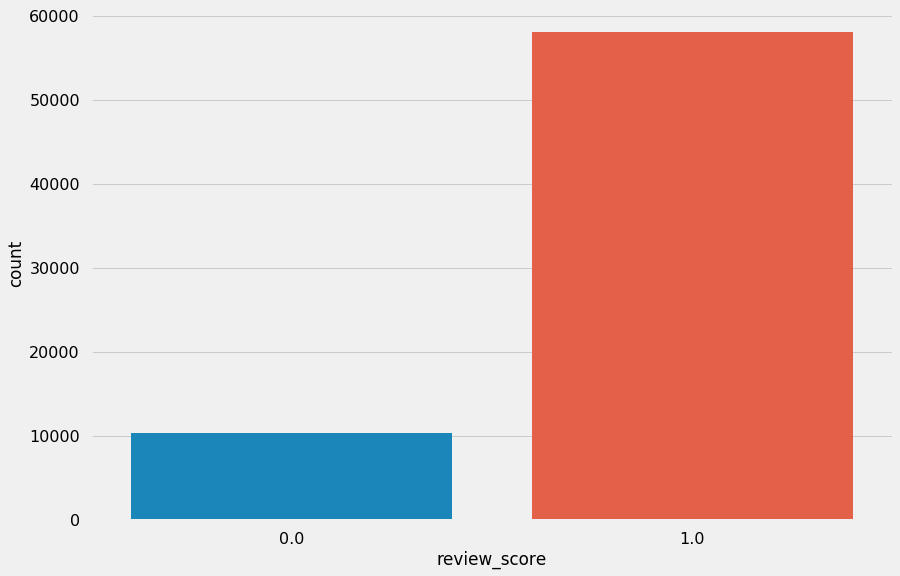

In [31]:
sns.countplot(y_train)

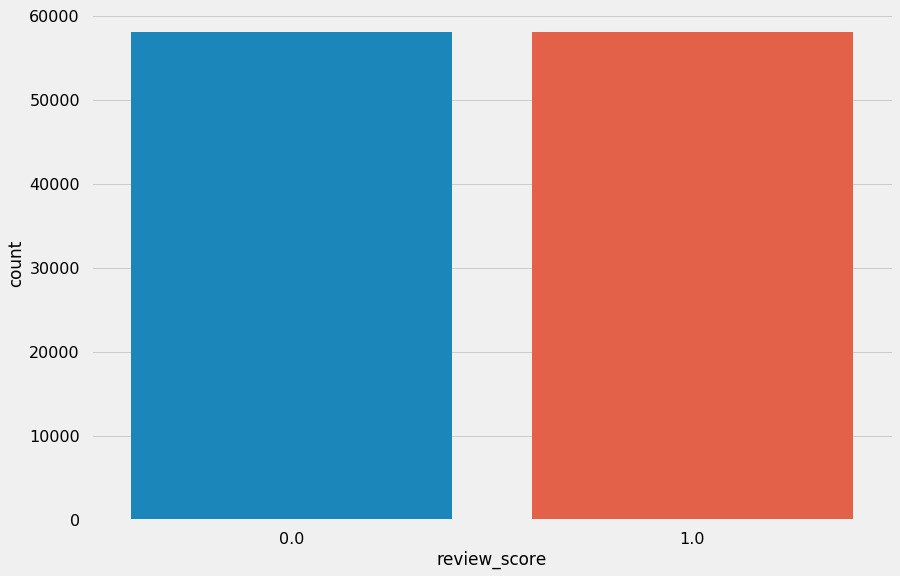

In [32]:
#oversample rebalanced data

sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)

sns.countplot(y_train)

### Feature Scaling

In [33]:
sc = StandardScaler()
X_train.iloc[:,0:15] = sc.fit_transform(X_train.iloc[:,0:15])
X_test.iloc[:,0:15] = sc.fit_transform(X_test.iloc[:,0:15])

C:\Users\Fabio\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [34]:
X_train

,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,boleto,credit_card,debit_card,not_defined,voucher,diff_approved,diff_carrier,diff_customer,diff_estimate,diff_est_del,customer_capital,customer_region_centro_oeste,customer_region_nordeste,customer_region_norte,customer_region_sudeste,customer_region_sul,product_category_name_bebes,product_category_name_beleza_saude,product_category_name_brinquedos,product_category_name_cama_mesa_banho,product_category_name_consoles_games,product_category_name_construcao_ferramentas_construcao,product_category_name_cool_stuff,product_category_name_eletrodomesticos,product_category_name_eletronicos,product_category_name_eletroportateis,product_category_name_esporte_lazer,product_category_name_fashion_bolsas_e_acessorios,product_category_name_ferramentas_jardim,product_category_name_informatica_acessorios,product_category_name_instrumentos_musicais,product_category_name_livros_interesse_geral,product_category_name_malas_acessorios,product_category_name_moveis_decoracao,product_category_name_moveis_escritorio,product_category_name_no info,product_category_name_papelaria,product_category_name_perfumaria,product_category_name_pet_shop,product_category_name_relogios_presentes,product_category_name_telefonia,product_category_name_utilidades_domesticas
0,-0.393128,-0.366137,0.850080,-0.008569,1.750407,2.196004,-1.009638,-0.130469,0.0,-0.153069,0.376525,-0.348677,-0.458216,1.406224,1.404076,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.119081,0.082998,0.850080,-0.880707,-0.696049,-0.523613,2.503014,-0.130469,0.0,-0.153069,-0.522413,-0.056837,0.779686,-0.455306,-1.074010,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.220749,0.136588,0.498729,-0.793649,-0.696049,-0.523613,1.449218,-0.130469,0.0,-0.153069,-0.523257,-0.716989,-0.037582,1.218479,0.863950,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.054263,-0.181379,-1.170186,-0.375458,-0.084435,-0.523613,-1.009638,-0.130469,0.0,2.428013,0.255819,-0.493891,-0.570439,0.025122,0.576716,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.236758,-0.494243,0.762242,-0.397222,-0.696049,-0.523613,2.503014,-0.130469,0.0,-0.153069,-0.464184,-0.337120,-0.420582,-0.800380,-0.130644,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116381,1.609356,0.795826,1.051382,-0.026274,0.862726,-0.523613,1.184965,-0.130469,0.0,-0.153069,0.525382,-0.281840,0.010074,1.281533,0.859993,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
116382,0.183257,-0.134586,0.411313,-0.534154,0.373542,-0.523613,-0.365371,-0.130469,0.0,1.351530,0.179587,0.175378,-0.264849,0.300986,0.464149,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
116383,-0.530329,-0.365824,0.876062,-0.914909,-0.084435,2.196004,-1.009638,-0.130469,0.0,-0.153069,1.600115,-0.225592,-0.338286,0.348309,0.568321,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
116384,-0.536651,-0.263249,0.323054,-0.084328,-0.181393,-0.523613,-0.362793,-0.130469,0.0,-0.153069,-0.527151,3.321273,0.863140,-0.251309,-1.017419,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Models

## Dummy classifier

In [35]:
#create the classifier
dummy_clf = DummyClassifier(strategy = 'uniform', random_state = 0)

#training
dummy_clf.fit(X_train, y_train)

#predict
dummy_pred = dummy_clf.predict(X_test)

In [36]:
# Accuracy
accuracy_score(y_test, dummy_pred)

0.5040806808907543

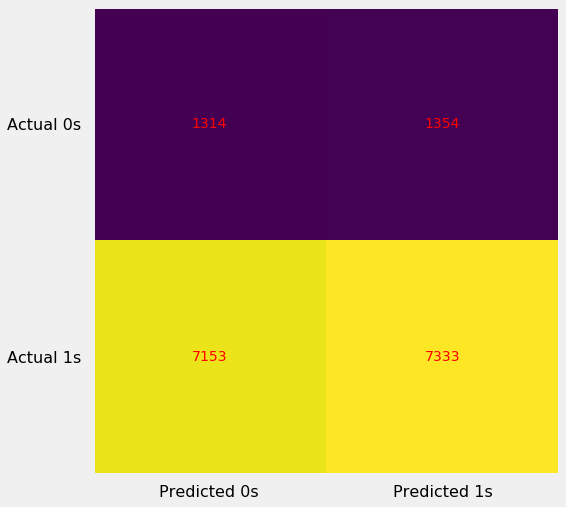

In [37]:
#Confusion Matrix
cm = confusion_matrix(y_test, dummy_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [38]:
# - AUC

dummy_probs = dummy_clf.predict_proba(X_test)

dummy_probs = dummy_probs[:, 1]

dummy_auc = roc_auc_score(y_test, dummy_probs)

print('Dummy: ROC AUC=%.3f' % (dummy_auc))

Dummy: ROC AUC=0.500


## Logistic Regression

### Training

In [39]:
%%time
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


Wall time: 2.05 s


C:\Users\Fabio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [40]:
#Metrics
logpred_train = logreg.predict(X_train)

#ACC
acc_train = accuracy_score(y_train, logpred_train)

#AUC
train_proba = logreg.predict_proba(X_train)
train_proba = train_proba[:, 1]

train_auc = roc_auc_score(y_train, train_proba)

print('Logistic Training Accuracy = %.3f' % (acc_train))
print('Logistic Training AUC = %.3f' % (train_auc))

Logistic Training Accuracy = 0.838
Logistic Training AUC = 0.897


###  Prediction on Test

In [41]:
logreg_pred = logreg.predict(X_test)

In [42]:
## Metrics on test

#ACCURACY
logreg_acc = accuracy_score(y_test, logreg_pred)

# AUC
logreg_prob = logreg.predict_proba(X_test)
logreg_prob = logreg_prob[:, 1]
logreg_auc = roc_auc_score(y_test, logreg_prob)

print('Logistic Test: ACCURACY = %.3f' % (logreg_acc))
print('Logistic Test: ROC AUC = %.3f' % (logreg_auc))

Logistic Test: ACCURACY = 0.790
Logistic Test: ROC AUC = 0.674


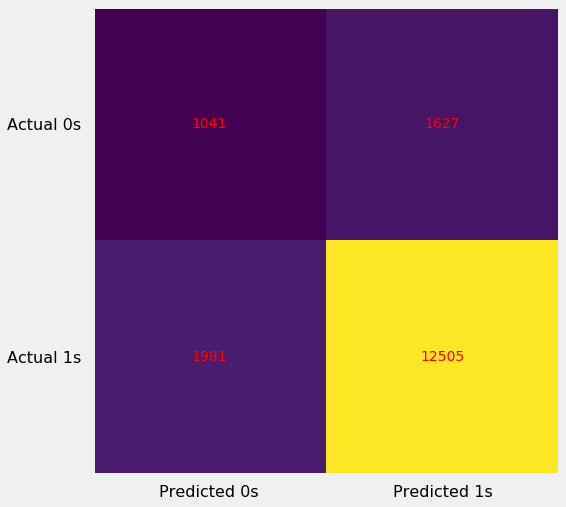

In [43]:
#confusion matrix
cm = confusion_matrix(y_test, logreg_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

Text(0.5, 0, 'False Positive Rate')

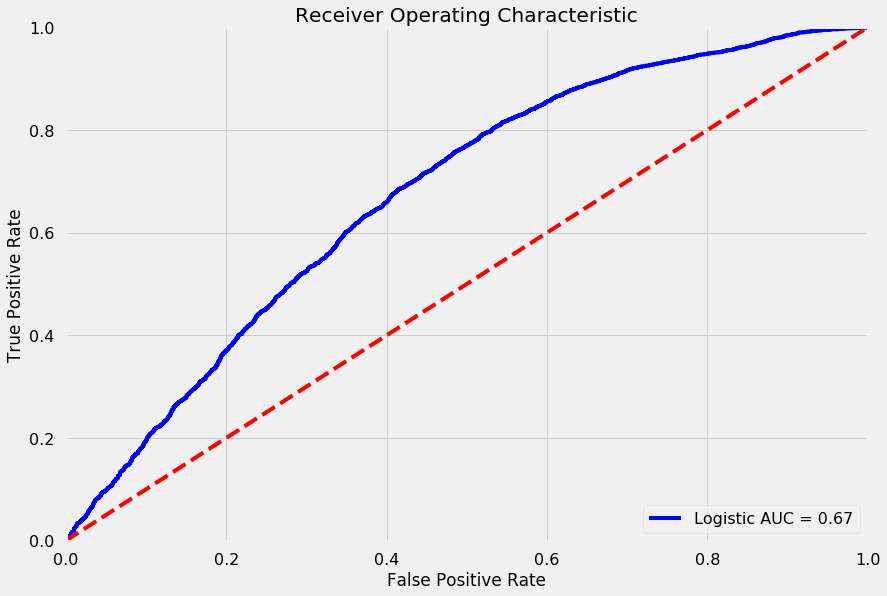

In [44]:
# AUC plot
lr_fpr, lr_tpr, threshold = roc_curve(y_test, logreg_prob)
lr_roc_auc = metrics.auc(lr_fpr, lr_tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(lr_fpr, lr_tpr, 'b', label = 'Logistic AUC = %0.2f' % lr_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [45]:
# build the models dataframe
d = {'model': ['Logistic Regression'], 'Train Accuracy': [acc_train], 'Train AUC': [train_auc],
     'Test Accuracy': [logreg_acc], 'Test AUC': [logreg_auc], 'AUC_diff': [train_auc - logreg_auc]
    
    }

df_models = pd.DataFrame(data = d)
df_models.head()

,model,Train Accuracy,Train AUC,Test Accuracy,Test AUC,AUC_diff
0,Logistic Regression,0.838133,0.897128,0.78967,0.67381,0.223318


## Random Forest

### Training

In [46]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

#predict on training
rf_pred_train = rf.predict(X_train)

In [47]:
## Metrics

# ACCURACY
rf_train_acc = accuracy_score(y_train, rf_pred_train)

# AUC
rf_train_prob = rf.predict_proba(X_train)
rf_train_prob = rf_train_prob[:, 1]
rf_train_auc = roc_auc_score(y_train, rf_train_prob)

print('Random Forest Training Accuracy = %.3f' % (rf_train_acc))
print('Random Forest Training AUC = %.3f' % (rf_train_auc))

Random Forest Training Accuracy = 1.000
Random Forest Training AUC = 1.000


### Test

In [48]:
#predict on test
rf_pred = rf.predict(X_test)

In [49]:
## Metrics

# ACCURACY
rf_acc = accuracy_score(y_test, rf_pred)

# AUC

rf_prob = rf.predict_proba(X_test)
rf_prob = rf_prob[:, 1]
rf_auc = roc_auc_score(y_test, rf_prob)

print('Random Forest Test Accuracy = %.3f' % (rf_acc))
print('Random Forest Test AUC = %.3f' % (rf_auc))

Random Forest Test Accuracy = 0.176
Random Forest Test AUC = 0.636


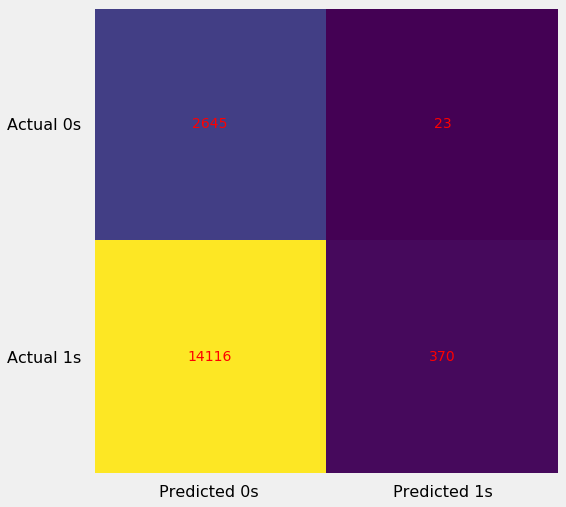

In [50]:
#confusion matrix
cm = confusion_matrix(y_test, rf_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

Text(0.5, 0, 'False Positive Rate')

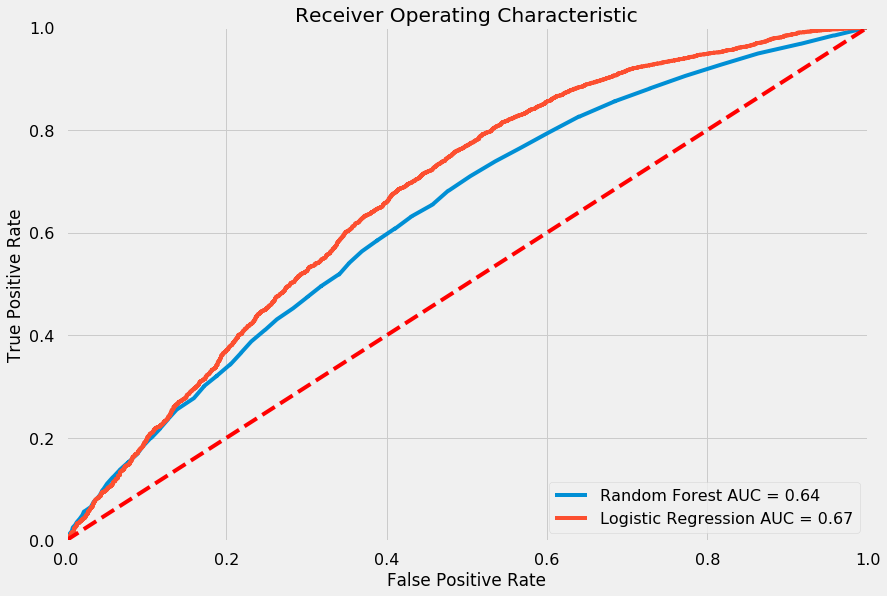

In [51]:
## AUC plot
rf_fpr, rf_tpr, threshold = roc_curve(y_test, rf_prob)
rf_roc_auc = metrics.auc(rf_fpr, rf_tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(rf_fpr, rf_tpr, label = 'Random Forest AUC = %0.2f' % rf_roc_auc)
plt.plot(lr_fpr, lr_tpr, label = 'Logistic Regression AUC = %0.2f' % lr_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [52]:
# add model values in dataframe

df_models.loc[1] = ['Random Forest', rf_train_acc, rf_train_auc,
                    rf_acc, rf_auc, (rf_train_auc - rf_auc) ]

df_models.head()

,model,Train Accuracy,Train AUC,Test Accuracy,Test AUC,AUC_diff
0,Logistic Regression,0.838133,0.897128,0.789670,0.673810,0.223318
1,Random Forest,0.999579,1.000000,0.175761,0.636324,0.363676


## XGBOOST

### Train

In [53]:
%%time
xgbd = xgb.XGBClassifier()
xgbd.fit(X_train, y_train)

Wall time: 26.4 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
#predict
xgbd_train_pred = xgbd.predict(X_train)

In [55]:
## Metrics

#ACCURACY
xgbd_train_acc = accuracy_score(y_train, xgbd_train_pred)

#AUC
xgbd_train_prob = xgbd.predict_proba(X_train)
xgbd_train_prob = xgbd_train_prob[:, 1]

xgbd_train_auc = roc_auc_score(y_train, xgbd_train_prob)

print('XGBoost Training Accuracy = %.3f' % (xgbd_train_acc))
print('XGBoost Training AUC = %.3f' % (xgbd_train_auc))

XGBoost Training Accuracy = 0.929
XGBoost Training AUC = 0.973


### Test

In [56]:
#predict
xgbd_pred = xgbd.predict(X_test)

In [57]:
## Metrics

#ACCURACY
xgbd_acc = accuracy_score(y_test, xgbd_pred)

#AUC
xgbd_prob = xgbd.predict_proba(X_test)
xgbd_prob = xgbd_prob[:, 1]

xgbd_auc = roc_auc_score(y_test, xgbd_prob)

print('XGBoost Test Accuracy = %.3f' % (xgbd_acc))
print('XGBoost Test AUC = %.3f' % (xgbd_auc))

XGBoost Test Accuracy = 0.156
XGBoost Test AUC = 0.575


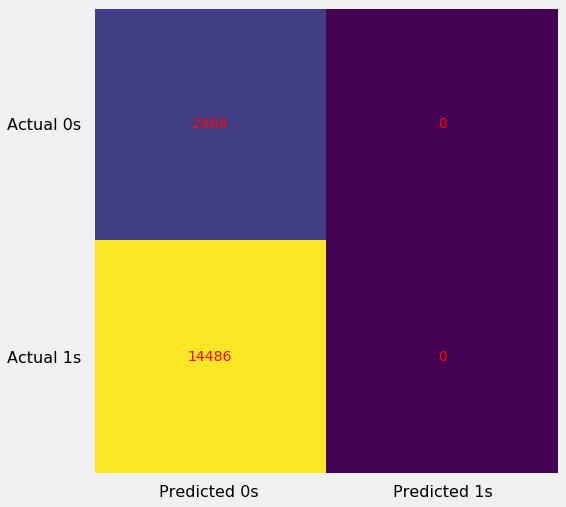

In [58]:
#confusion matrix
cm = confusion_matrix(y_test, xgbd_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

Text(0.5, 0, 'False Positive Rate')

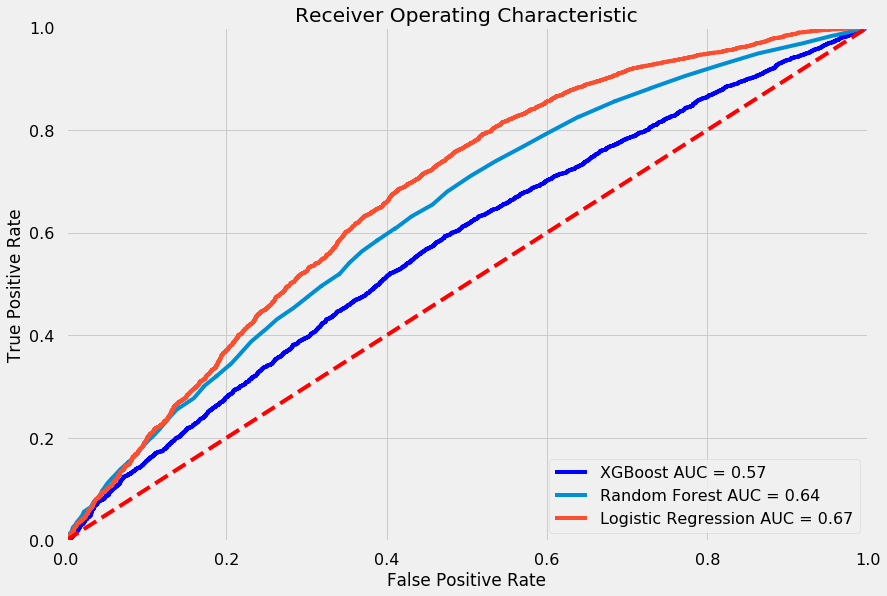

In [59]:
## AUC plot
xgbd_fpr, xgbd_tpr, threshold = roc_curve(y_test, xgbd_prob)
xgbd_roc_auc = metrics.auc(xgbd_fpr, xgbd_tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(xgbd_fpr, xgbd_tpr, 'b', label = 'XGBoost AUC = %0.2f' % xgbd_roc_auc)
plt.plot(rf_fpr, rf_tpr, label = 'Random Forest AUC = %0.2f' % rf_roc_auc)
plt.plot(lr_fpr, lr_tpr, label = 'Logistic Regression AUC = %0.2f' % lr_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [60]:
# add model values in dataframe

df_models.loc[2] = ['XGBoost', xgbd_train_acc, xgbd_train_auc,
                    xgbd_acc, xgbd_auc, (xgbd_train_auc - xgbd_auc) ]

df_models.head()

,model,Train Accuracy,Train AUC,Test Accuracy,Test AUC,AUC_diff
0,Logistic Regression,0.838133,0.897128,0.789670,0.673810,0.223318
1,Random Forest,0.999579,1.000000,0.175761,0.636324,0.363676
2,XGBoost,0.928995,0.973281,0.155532,0.574641,0.398640


In [61]:
# save models df to csv
df_models.to_csv('models.csv')

## Tuning Hyperparameter

## Logistic Regression

In [62]:
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
fit_intercept = ['True']
max_iter = [5000]
# define grid search
grid = dict(solver=solvers, penalty=penalty, C=c_values, fit_intercept=fit_intercept, max_iter=max_iter)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
logreg = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
logreg.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=1),
             error_score=0, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'fit_intercept': ['True'], 'max_iter': [5000],
                         'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='roc_auc')

In [63]:
print("Best: %f using %s" % (logreg.best_score_, logreg.best_params_))

Best: 0.896847 using {'C': 10, 'fit_intercept': 'True', 'max_iter': 5000, 'penalty': 'l2', 'solver': 'liblinear'}


### Train

In [64]:
#Metrics
logpred_train = logreg.predict(X_train)

#ACC
acc_train = accuracy_score(y_train, logpred_train)

#AUC
train_proba = logreg.predict_proba(X_train)
train_proba = train_proba[:, 1]

train_auc = roc_auc_score(y_train, train_proba)

print('Logistic Training Accuracy = %.3f' % (acc_train))
print('Logistic Training AUC = %.3f' % (train_auc))

Logistic Training Accuracy = 0.838
Logistic Training AUC = 0.897


In [65]:
# - Prediction score on training
logreg.score(X_train, y_train)

0.8971329006589273

### Test

In [66]:
logreg_pred = logreg.predict(X_test)

In [67]:
## Metrics on test

#ACCURACY
logreg_acc = accuracy_score(y_test, logreg_pred)

# AUC
logreg_prob = logreg.predict_proba(X_test)
logreg_prob = logreg_prob[:, 1]
logreg_auc = roc_auc_score(y_test, logreg_prob)

print('Logistic Test: ACCURACY = %.3f' % (logreg_acc))
print('Logistic Test: ROC AUC = %.3f' % (logreg_auc))

Logistic Test: ACCURACY = 0.790
Logistic Test: ROC AUC = 0.674


In [68]:
# prediction score on test
logreg.score(X_test, y_test)

0.6737820298396984

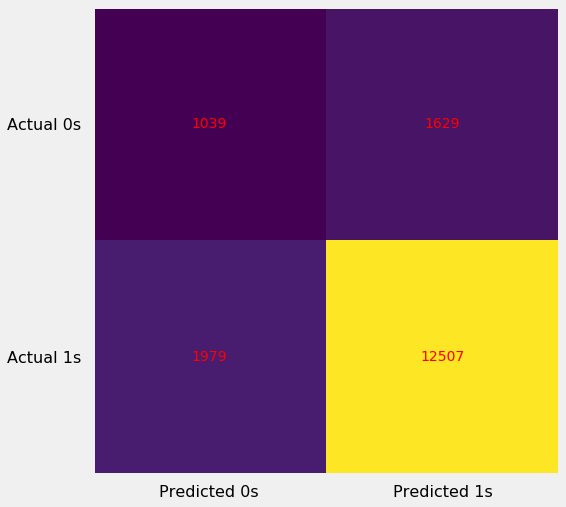

In [69]:
cm = confusion_matrix(y_test, logreg_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

Text(0.5, 0, 'False Positive Rate')

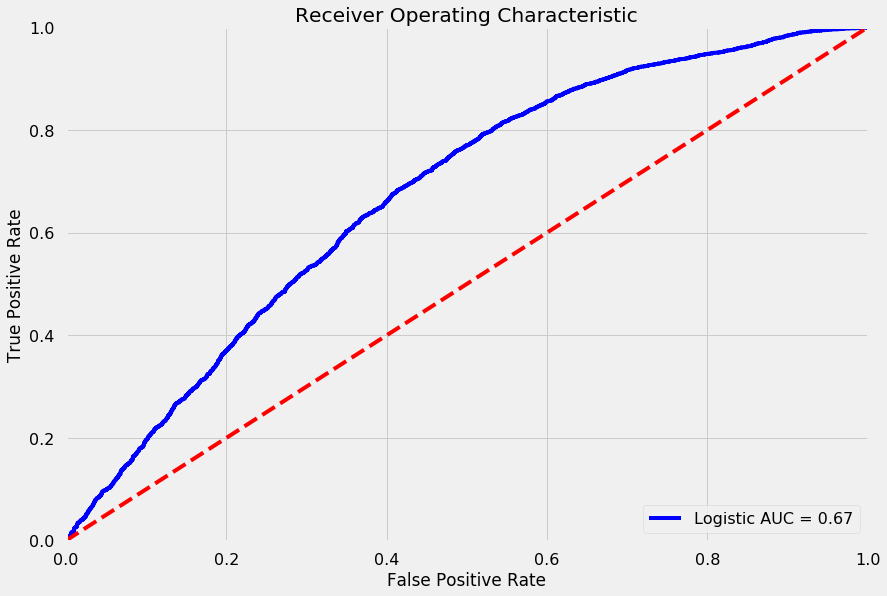

In [136]:
# AUC plot
lr_fpr, lr_tpr, threshold = roc_curve(y_test, logreg_prob)
lr_roc_auc = metrics.auc(lr_fpr, lr_tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(lr_fpr, lr_tpr, 'b', label = 'Logistic AUC = %0.2f' % lr_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## Random Forest

### Train

In [78]:
model = RandomForestClassifier()

param_grid = [
{'n_estimators': [100, 150, 200], 
 'max_depth': [5, 10, 50, 100, None], 'bootstrap': [True, False],
 'min_samples_split': [5, 10]}
]

grid_search_forest = GridSearchCV(estimator = model, param_grid = param_grid, cv=5, scoring='roc_auc')
grid_search_forest.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [5, 10, 50, 100, None],
                          'min_samples_split': [5, 10],
                          'n_estimators': [100, 150, 200]}],
             scoring='roc_auc')

In [81]:
grid_search_forest.best_params_

{'bootstrap': False,
 'max_depth': 100,
 'min_samples_split': 5,
 'n_estimators': 200}

In [79]:
# - Prediction score on training
grid_search_forest.score(X_train, y_train)

0.9999996395904498

### Test

In [80]:
grid_search_forest.score(X_test, y_test)

0.6243491363527128

In [131]:
gsf = grid_search_forest.predict(X_test)

In [132]:
## Metrics

# ACCURACY
gsf_acc = accuracy_score(y_test, gsf)

# AUC

gsf_prob = grid_search_forest.predict_proba(X_test)
gsf_prob = gsf_prob[:, 1]
gsf_auc = roc_auc_score(y_test, gsf_prob)

print('Random Forest Test Accuracy = %.3f' % (gsf_acc))
print('Random Forest Test AUC = %.3f' % (gsf_auc))

Random Forest Test Accuracy = 0.168
Random Forest Test AUC = 0.624


Text(0.5, 0, 'False Positive Rate')

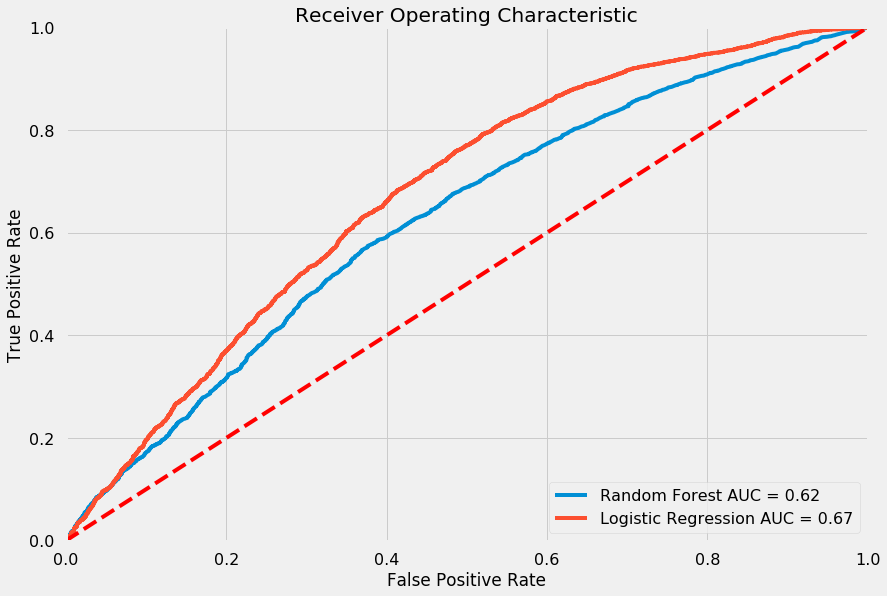

In [138]:
## AUC plot
rf_fpr, rf_tpr, threshold = roc_curve(y_test, gsf_prob)
rf_roc_auc = metrics.auc(rf_fpr, rf_tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(rf_fpr, rf_tpr, label = 'Random Forest AUC = %0.2f' % rf_roc_auc)
plt.plot(lr_fpr, lr_tpr, label = 'Logistic Regression AUC = %0.2f' % lr_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### XGBoost

In [83]:
xgb1 = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1)

### Train

In [84]:
xgb1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [85]:
#predict
xgb1_train_pred = xgb1.predict(X_train)

In [86]:
## Metrics

#ACCURACY
xgb1_train_acc = accuracy_score(y_train, xgb1_train_pred)

#AUC
xgb1_train_prob = xgb1.predict_proba(X_train)
xgb1_train_prob = xgb1_train_prob[:, 1]

xgb1_train_auc = roc_auc_score(y_train, xgb1_train_prob)

print('XGBoost Training Accuracy = %.3f' % (xgb1_train_acc))
print('XGBoost Training AUC = %.3f' % (xgb1_train_auc))

XGBoost Training Accuracy = 0.929
XGBoost Training AUC = 0.987


In [87]:
#predict
xgb1_pred = xgb1.predict(X_test)

In [88]:
## Metrics

#ACCURACY
xgb1_acc = accuracy_score(y_test, xgb1_pred)

#AUC
xgb1_prob = xgb1.predict_proba(X_test)
xgb1_prob = xgb1_prob[:, 1]

xgb1_auc = roc_auc_score(y_test, xgb1_prob)

print('XGBoost Test Accuracy = %.3f' % (xgb1_acc))
print('XGBoost Test AUC = %.3f' % (xgb1_auc))

XGBoost Test Accuracy = 0.156
XGBoost Test AUC = 0.626


#### Tunning #2

In [95]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

In [96]:
gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, 
                        gamma=0, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic',
                                                  nthread=4, scale_pos_weight=1), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=-1, cv=5)

In [97]:
gsearch1.fit(X_train, y_train)

C:\Users\Fabio\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, subsample=0.8,
                                     tree_method=Non

In [99]:
gsearch1.score(X_train, y_train)

0.9849689961368464

In [100]:
gsearch1.score(X_test, y_test)

0.6584397725891991

In [101]:
gsearch1.best_params_

{'max_depth': 9, 'min_child_weight': 1}

### Tuning #3    

reg_alpha

In [102]:
param_test2 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

In [104]:
gsearch2 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, 
                        gamma=0, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic',
                                                  nthread=4, scale_pos_weight=1,
                                                    max_depth = 9, min_child_weight = 1), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=-1, cv=5)

In [105]:
gsearch2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=9, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, subsample=0.8,
                                     tree_method=None, val

In [106]:
gsearch2.score(X_train, y_train)

0.9843107588110237

In [107]:
gsearch2.score(X_test, y_test)

0.6511474347045723

In [111]:
gsearch2.best_params_, gsearch2.best_score_

({'reg_alpha': 0.01}, 0.9476914949566098)

In [112]:
gsearch2.cv_results_

{'mean_fit_time': array([147.40257134, 144.51745391, 144.01844654, 138.92019906,
        112.20783596]),
 'std_fit_time': array([ 3.32350315,  3.77039877,  2.34599054,  2.82854099, 36.15722523]),
 'mean_score_time': array([0.45343685, 0.5048944 , 0.40127492, 0.52533293, 0.36064134]),
 'std_score_time': array([0.05895877, 0.05439036, 0.05214636, 0.1275887 , 0.103275  ]),
 'param_reg_alpha': masked_array(data=[1e-05, 0.01, 0.1, 1, 100],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'reg_alpha': 1e-05},
  {'reg_alpha': 0.01},
  {'reg_alpha': 0.1},
  {'reg_alpha': 1},
  {'reg_alpha': 100}],
 'split0_test_score': array([0.75023414, 0.75148919, 0.75138089, 0.7488955 , 0.71997141]),
 'split1_test_score': array([0.99692546, 0.99695911, 0.99677901, 0.9968749 , 0.98720991]),
 'split2_test_score': array([0.99659658, 0.99664874, 0.99673147, 0.99670438, 0.9879583 ]),
 'split3_test_score': array([0.99656013, 0.99660771, 0.996

try again with values around 0.01

In [113]:
param_test3 = {
    'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}

In [114]:
gsearch3 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, 
                        gamma=0, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic',
                                                  nthread=4, scale_pos_weight=1,
                                                    max_depth = 9, min_child_weight = 1), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=-1, cv=5)

In [115]:
gsearch3.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=9, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, subsample=0.8,
                                     tree_method=None, val

In [116]:
gsearch3.score(X_train, y_train)

0.984669710481479

In [117]:
gsearch3.score(X_test, y_test)

0.6552522613468911

In [118]:
gsearch3.best_params_, gsearch3.best_score_

({'reg_alpha': 0.05}, 0.9479816659269528)

In [119]:
gsearch3.cv_results_

{'mean_fit_time': array([147.31728044, 153.73210015, 166.10073843, 152.34956579,
        133.42908516]),
 'std_fit_time': array([ 3.58431793,  6.87094846,  6.97042887,  5.29837808, 43.20120498]),
 'mean_score_time': array([0.41744285, 0.45572305, 0.46393061, 0.49952135, 0.32967272]),
 'std_score_time': array([0.0403255 , 0.06561123, 0.12447747, 0.03645675, 0.05953477]),
 'param_reg_alpha': masked_array(data=[0, 0.001, 0.005, 0.01, 0.05],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'reg_alpha': 0},
  {'reg_alpha': 0.001},
  {'reg_alpha': 0.005},
  {'reg_alpha': 0.01},
  {'reg_alpha': 0.05}],
 'split0_test_score': array([0.75023418, 0.7507038 , 0.75227319, 0.75148919, 0.75285679]),
 'split1_test_score': array([0.99695174, 0.99685817, 0.99690946, 0.99695911, 0.99692846]),
 'split2_test_score': array([0.99659657, 0.99679466, 0.99671112, 0.99664874, 0.99670813]),
 'split3_test_score': array([0.99647396, 0.99670293,

### Tuning #4

Reducing learning rate and increasing n_estimators

In [124]:
xgb2 = xgb.XGBClassifier(
    learning_rate =0.01,
    n_estimators=1000, 
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    max_depth = 9,
    min_child_weight = 1,
    reg_alpha = 0.05)

In [125]:
xgb2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [126]:
#predict
xgb2_pred = xgb1.predict(X_test)

In [127]:
## Metrics

#ACCURACY
xgb2_acc = accuracy_score(y_test, xgb2_pred)

#AUC
xgb2_prob = xgb2.predict_proba(X_test)
xgb2_prob = xgb2_prob[:, 1]

xgb2_auc = roc_auc_score(y_test, xgb2_prob)

print('XGBoost Test Accuracy = %.3f' % (xgb2_acc))
print('XGBoost Test AUC = %.3f' % (xgb2_auc))

XGBoost Test Accuracy = 0.156
XGBoost Test AUC = 0.640


Text(0.5, 0, 'False Positive Rate')

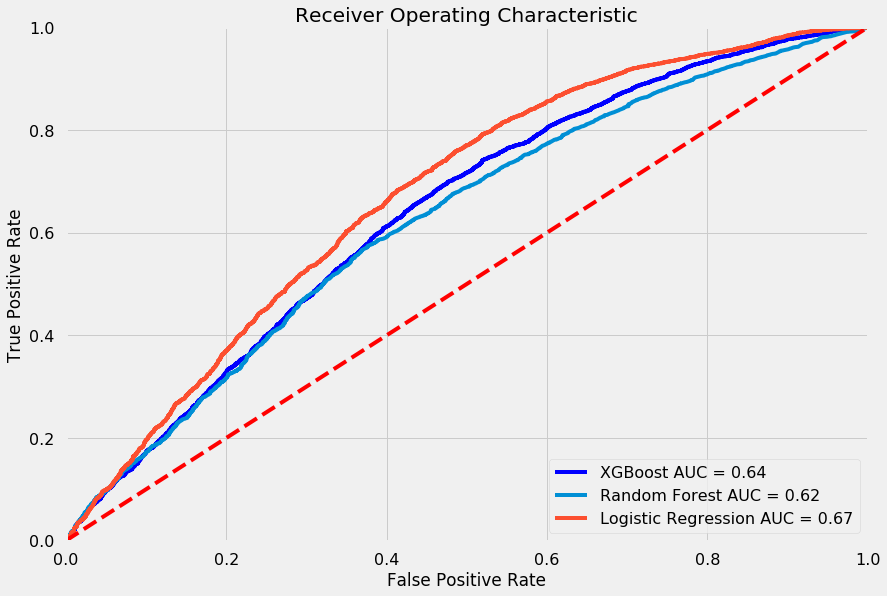

In [139]:
## AUC plot
xgb2_fpr, xgb2_tpr, threshold = roc_curve(y_test, xgb2_prob)
xgb2_roc_auc = metrics.auc(xgb2_fpr, xgb2_tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(xgb2_fpr, xgb2_tpr, 'b', label = 'XGBoost AUC = %0.2f' % xgb2_roc_auc)
plt.plot(rf_fpr, rf_tpr, label = 'Random Forest AUC = %0.2f' % rf_roc_auc)
plt.plot(lr_fpr, lr_tpr, label = 'Logistic Regression AUC = %0.2f' % lr_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

The best model still Logistic Regression after hyperparameter tunning.